In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Boston.

You can read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing).

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [38]:
data_file_location = "../../../data/boston.csv"
info_file_location = "../../../data/boston.txt"

boston_housing_df = pd.read_csv(data_file_location, index_col=None,
                                header=None,
                                delim_whitespace=True)
boston_housing_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", 
                             "NOX", "RM", "AGE", "DIS", 
                             "RAD", "TAX", "PTRATIO", "B", 
                             "LSTAT", "MEDV"]

Make sure the dataframe loaded correctly and that your columns are labeled appropriately.

In [39]:
boston_housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Exploratory Analysis

Use `pandas` and `seaborn` to visualize the data.

Read about available `pandas` plotting tools [here](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#other-plots).

Read about available `seaborn` plotting tools:

- [regression plots](http://seaborn.pydata.org/api.html#regression-plots)
- [distribution plots](http://seaborn.pydata.org/api.html#distribution-plots)
- [cateogorical plots](http://seaborn.pydata.org/api.html#categorical-plots)

Make sure you include at least two plots of each feature.

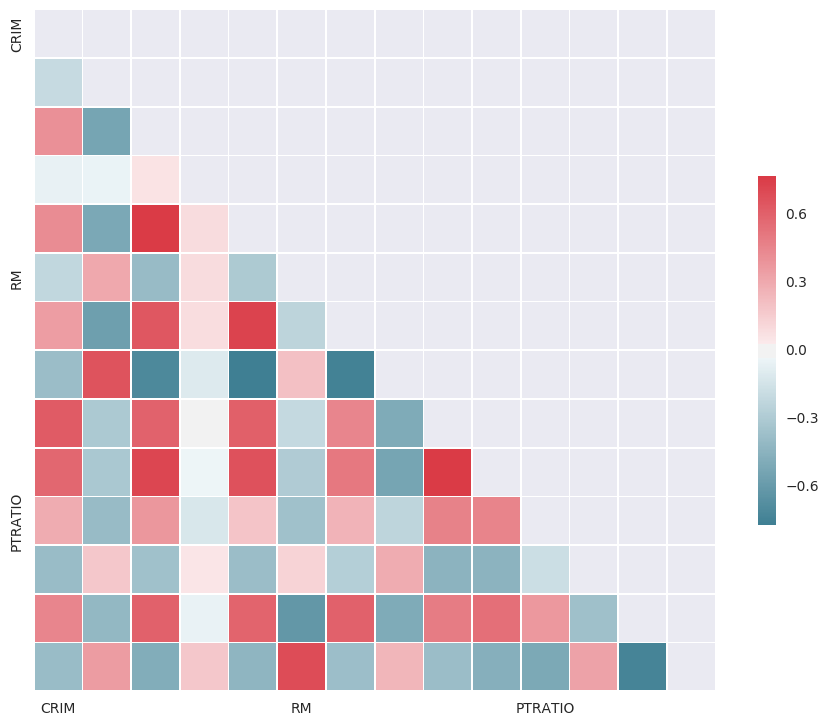

In [41]:
corr = boston_housing_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

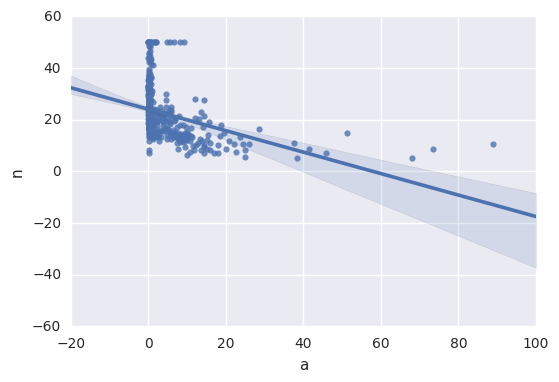

In [20]:
this_plot = sns.regplot(x='a', y='n', data=boston_housing_df)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(boston_housing_df['MEDV'], res.predict())

4.5052811662505574

In [60]:
np.mean(np.abs(boston_housing_df['MEDV'] - res.predict()))

4.5052811662505574

## Single Variable Regressions

Identify two features that you think are good predictors of the target, Median Value of Owner Occupied Homes.

1. RM 
2. LSTAT
3. PTRATIO

### Regression One

Perform a regression on your first feature.

In [62]:
MEDV_to_RM = smf.ols('MEDV ~ RM', data=boston_housing_df)
res = MEDV_to_RM.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           2.49e-74
Time:                        00:57:30   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
mean_absolute_error(boston_housing_df['MEDV'], res.predict())

4.4477729015322325

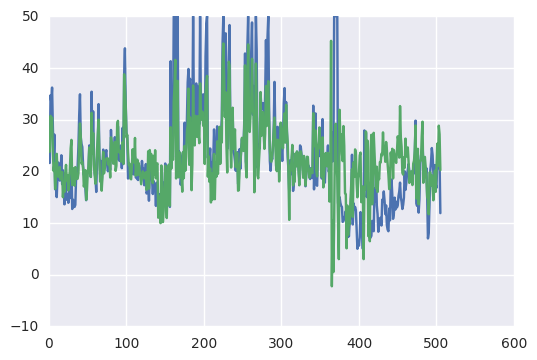

In [64]:
plt.plot(boston_housing_df['MEDV'])
plt.plot(res.predict())

Plot the predicted values versus the true values.

In [57]:
MEDV_to_LSTAT = smf.ols('MEDV ~ LSTAT', data=boston_housing_df)
res = MEDV_to_LSTAT.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 20 Dec 2016   Prob (F-statistic):           5.08e-88
Time:                        00:57:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

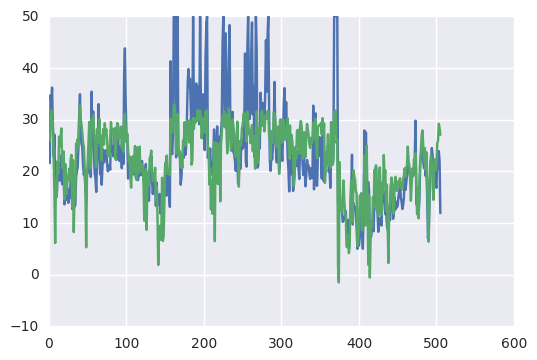

In [61]:
plt.plot(boston_housing_df['MEDV'])
plt.plot(res.predict())

**ANSWER:** How well does this model fit?

### Regression Two

Perform a regression on your second feature.

Plot the predicted values versus the true values.

**ANSWER:** How well does this model fit?

## Multi-Variable Regression

Identify two features that you think together are a good predictor of the target, Median Value of Owner Occupied Homes.

1.  
2.  

Perform a multi-variate regression on your two features.

Plot the predicted values versus the true values.

**ANSWER:** How well does this model fit?

## Multi-Variable Regression

Identify three features that you think together are a good predictor of the target, Median Value of Owner Occupied Homes.

1.  
2.  
3.  

Perform a multi-variate regression on your three features.

Plot the predicted values versus the true values.

**ANSWER:** How well does this model fit?

## Bonus Exercises

* Find the best model you can with the three features